In [65]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import glob
import scipy.stats as st
import datetime as dt

# Study data files
pm25_data_path = "Resources/aqi.csv"
ozone_data_path = "Resources/ozone.csv"
#Traffic_Data = "data/MNDOT.csv"

# Read the PM2.5 data and the Ozone Data
pm25_data = pd.read_csv(pm25_data_path)
ozone_data = pd.read_csv(ozone_data_path)

#Combine all AQI files
Combined_AQI_csv=pd.merge(pm25_data,ozone_data,on="Date",how="left")
#Export to CSV
Combined_AQI_csv.to_csv( "Combined_AQI_csv.csv", index=False)
Combined_AQI_csv.head()

,Date,Source_x,Site ID_x,POC_x,Daily Mean PM2.5 Concentration,UNITS_x,DAILY_AQI_VALUE_x,Site Name_x,DAILY_OBS_COUNT_x,PERCENT_COMPLETE_x,...,AQS_PARAMETER_CODE_y,AQS_PARAMETER_DESC_y,CBSA_CODE_y,CBSA_NAME_y,STATE_CODE_y,STATE_y,COUNTY_CODE_y,COUNTY_y,SITE_LATITUDE_y,SITE_LONGITUDE_y
0,1/1/2015,AQS,270530962,3,7.7,ug/m3 LC,32,Near Road I-35/I-94,1,100,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1/2/2015,AQS,270530962,3,7.5,ug/m3 LC,31,Near Road I-35/I-94,1,100,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1/3/2015,AQS,270530962,3,14.1,ug/m3 LC,55,Near Road I-35/I-94,1,100,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1/4/2015,AQS,270530962,3,9.4,ug/m3 LC,39,Near Road I-35/I-94,1,100,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1/5/2015,AQS,270530962,3,10.5,ug/m3 LC,44,Near Road I-35/I-94,1,100,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


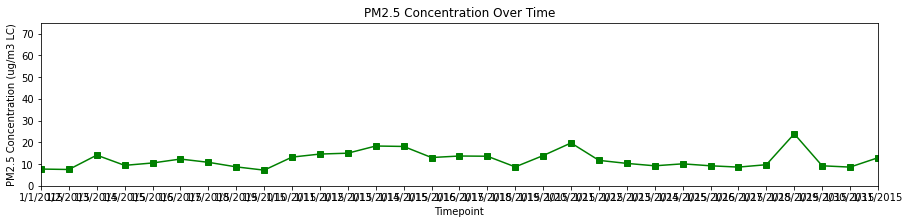

In [52]:
#Create plot tracking AQI change over time
x_axis=Combined_AQI_csv["Date"]
y_axis=Combined_AQI_csv["Daily Mean PM2.5 Concentration"]
plt.figure(figsize=(15,3))
plt.plot(x_axis,y_axis,marker='s',color="g")
plt.title("PM2.5 Concentration Over Time")
plt.xlabel("Timepoint")
plt.ylabel("PM2.5 Concentration (ug/m3 LC)")

#PM2.5 Concentration Limits
plt.ylim(0,75)
#Date Limits
plt.xlim(0,30)

#Print
plt.show()

In [69]:
# #Combined_AQI_csv["Date"]= dt.datetime(Combined_AQI_csv["Date"],"%b/%d/%Y")
# Combined_AQI_csv['Date'] = pd.to_datetime(Combined_AQI_csv.Date)
# Combined_AQI_csv['Date'] = Combined_AQI_csv['Date'].dt.strftime('%m/%d/%Y')

# #Week_DF = Combined_AQI_csv
# #Week_DF['Week'] = pd.to_datetime(Week_DF['Date']) - pd.to_timedelta(7, unit='d')
# #Week_DF = Week_DF.groupby(['Date', pd.Grouper(key='Date', freq='W-MON')])['Daily Mean PM2.5 Concentration'].sum().reset_index().sort_values('Date')
    
# Combined_AQI_csv["week"]=Combined_AQI_csv["Date"].dt.strftime("%V")    

#Combined_AQI_csv["week"]=Combined_AQI_csv["Date"].dt.week
Week_DF = Combined_AQI_csv.groupby(pd.Grouper(key="Date",freq="1W")).mean()["Daily Mean PM2.5 Concentration"]
Week_DF

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'Index'

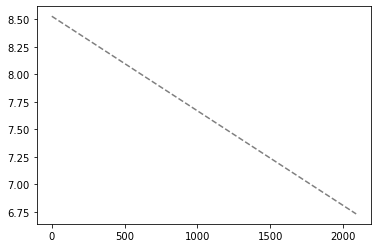

The correlation coefficient between weight and average final tumor volume is 0.01


In [67]:
# Calculate the correlation coefficient and linear regression model 
# Based on PM2.5 over Time
m_slope, m_int, m_r, m_p, m_std_err = st.linregress(Combined_AQI_csv.index.values, Combined_AQI_csv["Daily Mean PM2.5 Concentration"])
m_fit = m_slope * Combined_AQI_csv.index.values + m_int
#plt.scatter(Combined_AQI_csv["Date"], Combined_AQI_csv["Daily Mean PM2.5 Concentration"], marker="^", facecolors="red", edgecolors="black")
# plt.title("PM2.5 Regression Analysis")
# plt.xlabel("Time")
# plt.ylabel("PM2.5 Concentration (ug/m3 LC)")

# plt.ylim(0,75)
plt.plot(Combined_AQI_csv.index.values,m_fit,"--",color="black",alpha=.5)
plt.show()

#Correlation Coefficient
W=Combined_AQI_csv["Date"]
A=Combined_AQI_csv["Daily Mean PM2.5 Concentration"]
print(f"The correlation coefficient between weight and average final tumor volume is {round(m_r**2,2)}")